In [ ]:
import torch
from directed_graphs.multiscale_flow_embedder import MultiscaleDiffusionFlowEmbedder
from directed_graphs.datasets import directed_swiss_roll
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
X, flow, labels = directed_swiss_roll()
lw = {"diffusion":0,"smoothness":0,"reconstruction":0,"diffusion map regularization":1,"flow cosine loss":1}

In [ ]:
X = torch.tensor(X)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

In [ ]:
MFE = MultiscaleDiffusionFlowEmbedder(X, flow, device=device, loss_weights=lw).to(device)

  0%|          | 0/1000 [00:00<?, ?it/s]/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646756402876/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
EPOCH 0. Loss 0.0. Flow strength 5.0. Heatmap of P embedding is 


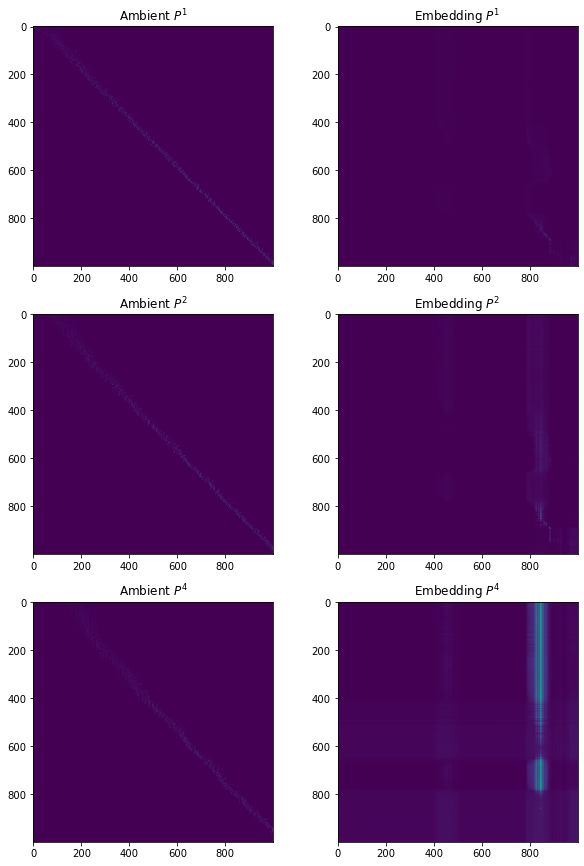

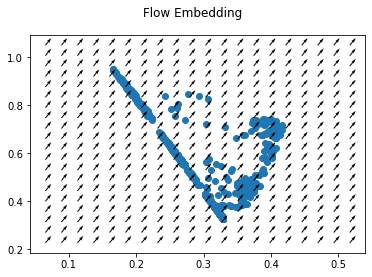

  0%|          | 4/1000 [00:01<03:43,  4.46it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  1%|          | 10/1000 [00:01<01:26, 11.43it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  2%|▏         | 16/1000 [00:01<00:57, 17.20it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  2%|▏         | 22/1000 [00:01<00:45, 21.32it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  3%|▎         | 28/1000 [00:02<00:42, 23.08it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  3%|▎         | 34/1000 [00:02<00:39, 24.23it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  4%|▍         | 40/1000 [00:02<00:39, 24.53it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207


  5%|▍         | 46/1000 [00:02<00:37, 25.35it/s]

Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  5%|▌         | 52/1000 [00:03<00:36, 26.27it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  6%|▌         | 58/1000 [00:03<00:35, 26.65it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  6%|▋         | 64/1000 [00:03<00:34, 26.92it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  7%|▋         | 70/1000 [00:03<00:34, 26.63it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  8%|▊         | 76/1000 [00:03<00:34, 26.85it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  8%|▊         | 82/1000 [00:04<00:35, 25.93it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  9%|▉         | 88/1000 [00:04<00:36, 25.19it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


  9%|▉         | 91/1000 [00:04<00:35, 25.37it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 10%|▉         | 97/1000 [00:04<00:35, 25.54it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 10%|█         | 103/1000 [00:04<00:34, 26.10it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 11%|█         | 109/1000 [00:05<00:34, 26.06it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 12%|█▏        | 118/1000 [00:05<00:33, 26.67it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 12%|█▏        | 121/1000 [00:05<00:32, 26.94it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 13%|█▎        | 130/1000 [00:05<00:32, 27.02it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 13%|█▎        | 133/1000 [00:06<00:32, 26.81it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 14%|█▍        | 139/1000 [00:06<00:32, 26.57it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 14%|█▍        | 145/1000 [00:06<00:31, 26.75it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 15%|█▌        | 151/1000 [00:06<00:32, 26.26it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 16%|█▌        | 157/1000 [00:06<00:32, 26.14it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 16%|█▋        | 163/1000 [00:07<00:32, 26.07it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 17%|█▋        | 169/1000 [00:07<00:32, 25.84it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 18%|█▊        | 175/1000 [00:07<00:31, 25.89it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 18%|█▊        | 181/1000 [00:07<00:31, 25.74it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 19%|█▊        | 187/1000 [00:08<00:31, 26.01it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 19%|█▉        | 193/1000 [00:08<00:31, 25.98it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 20%|██        | 202/1000 [00:08<00:29, 27.01it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 21%|██        | 208/1000 [00:08<00:29, 27.16it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 21%|██▏       | 214/1000 [00:09<00:28, 27.57it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 22%|██▏       | 217/1000 [00:09<00:29, 26.30it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 22%|██▏       | 223/1000 [00:09<00:29, 25.98it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 23%|██▎       | 229/1000 [00:09<00:29, 26.22it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 24%|██▎       | 235/1000 [00:09<00:28, 26.60it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 24%|██▍       | 241/1000 [00:10<00:29, 25.88it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 25%|██▌       | 250/1000 [00:10<00:28, 26.74it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 25%|██▌       | 253/1000 [00:10<00:28, 26.61it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 26%|██▌       | 259/1000 [00:10<00:27, 27.06it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 26%|██▋       | 265/1000 [00:11<00:27, 26.34it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 27%|██▋       | 271/1000 [00:11<00:27, 26.35it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 28%|██▊       | 277/1000 [00:11<00:27, 26.29it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 28%|██▊       | 283/1000 [00:11<00:27, 26.38it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 29%|██▉       | 289/1000 [00:12<00:27, 25.99it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 30%|██▉       | 295/1000 [00:12<00:27, 26.02it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 30%|███       | 301/1000 [00:12<00:26, 26.31it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 31%|███       | 307/1000 [00:12<00:26, 26.27it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 32%|███▏      | 316/1000 [00:13<00:25, 26.91it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 32%|███▏      | 319/1000 [00:13<00:25, 26.85it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 32%|███▎      | 325/1000 [00:13<00:25, 26.27it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 33%|███▎      | 331/1000 [00:13<00:25, 26.49it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 34%|███▎      | 337/1000 [00:13<00:25, 25.63it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 34%|███▍      | 343/1000 [00:14<00:25, 26.22it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 35%|███▍      | 349/1000 [00:14<00:25, 25.92it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 36%|███▌      | 355/1000 [00:14<00:25, 25.56it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 36%|███▋      | 364/1000 [00:14<00:23, 26.55it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 37%|███▋      | 370/1000 [00:15<00:23, 26.82it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 38%|███▊      | 376/1000 [00:15<00:22, 27.15it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 38%|███▊      | 379/1000 [00:15<00:22, 27.18it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 38%|███▊      | 385/1000 [00:15<00:23, 26.45it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 39%|███▉      | 394/1000 [00:15<00:22, 26.99it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 40%|████      | 400/1000 [00:16<00:22, 27.17it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 40%|████      | 403/1000 [00:16<00:22, 26.86it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 41%|████      | 409/1000 [00:16<00:22, 26.79it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 42%|████▏     | 415/1000 [00:16<00:22, 26.41it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 42%|████▏     | 421/1000 [00:17<00:21, 26.38it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 43%|████▎     | 427/1000 [00:17<00:22, 25.94it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 43%|████▎     | 433/1000 [00:17<00:21, 25.89it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 44%|████▍     | 439/1000 [00:17<00:21, 26.47it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 44%|████▍     | 445/1000 [00:17<00:20, 26.96it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 45%|████▌     | 451/1000 [00:18<00:20, 26.52it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 46%|████▌     | 457/1000 [00:18<00:20, 26.68it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 46%|████▋     | 463/1000 [00:18<00:20, 25.78it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 47%|████▋     | 472/1000 [00:18<00:19, 26.66it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 48%|████▊     | 475/1000 [00:19<00:19, 26.50it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 48%|████▊     | 481/1000 [00:19<00:19, 26.71it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 49%|████▊     | 487/1000 [00:19<00:19, 26.31it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 49%|████▉     | 493/1000 [00:19<00:19, 25.69it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 50%|████▉     | 499/1000 [00:19<00:18, 26.53it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
EPOCH 500. Loss 0.0. Flow strength 5.0. Heatmap of P embedding is 


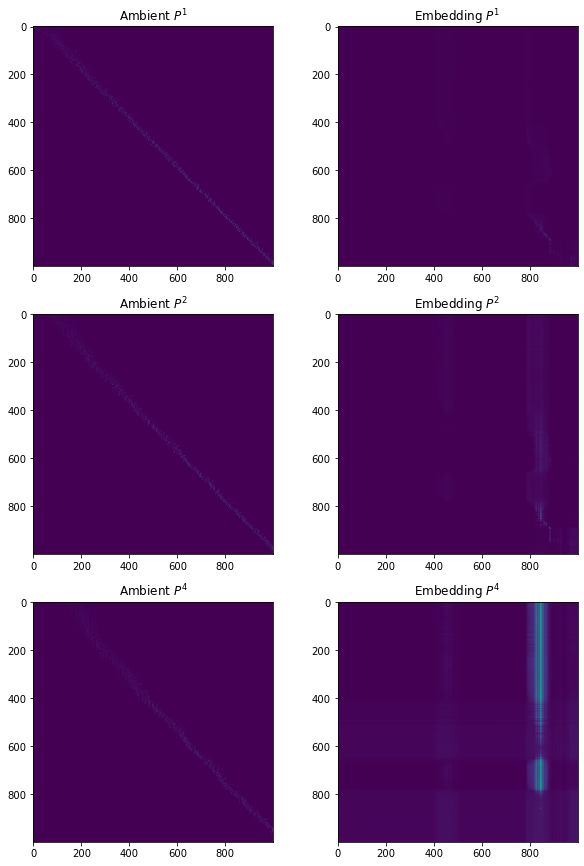

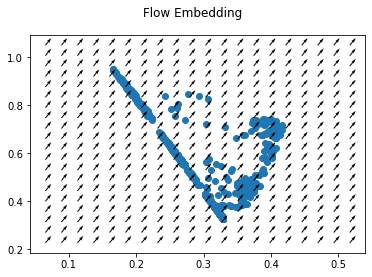

 50%|█████     | 505/1000 [00:21<00:52,  9.38it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 51%|█████     | 511/1000 [00:21<00:34, 14.03it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 52%|█████▏    | 517/1000 [00:21<00:26, 18.34it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 52%|█████▏    | 523/1000 [00:21<00:22, 21.37it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 53%|█████▎    | 529/1000 [00:22<00:19, 23.70it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 54%|█████▎    | 535/1000 [00:22<00:18, 25.37it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 54%|█████▍    | 541/1000 [00:22<00:17, 26.22it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 55%|█████▍    | 547/1000 [00:22<00:16, 26.75it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 55%|█████▌    | 553/1000 [00:22<00:17, 25.75it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 56%|█████▌    | 559/1000 [00:23<00:17, 25.54it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 56%|█████▋    | 565/1000 [00:23<00:16, 26.16it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 57%|█████▋    | 571/1000 [00:23<00:16, 26.60it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 58%|█████▊    | 577/1000 [00:23<00:15, 26.76it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 58%|█████▊    | 583/1000 [00:24<00:15, 27.13it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 59%|█████▉    | 589/1000 [00:24<00:15, 27.27it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 60%|█████▉    | 595/1000 [00:24<00:14, 27.11it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 60%|██████    | 601/1000 [00:24<00:14, 26.96it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 61%|██████    | 607/1000 [00:24<00:14, 27.44it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 61%|██████▏   | 613/1000 [00:25<00:14, 27.43it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 62%|██████▏   | 619/1000 [00:25<00:14, 27.12it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 62%|██████▎   | 625/1000 [00:25<00:14, 26.36it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 63%|██████▎   | 631/1000 [00:25<00:14, 26.00it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207


 64%|██████▎   | 637/1000 [00:26<00:14, 25.29it/s]

Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 64%|██████▍   | 643/1000 [00:26<00:13, 25.78it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 65%|██████▍   | 649/1000 [00:26<00:13, 25.31it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477


 65%|██████▌   | 652/1000 [00:26<00:13, 25.63it/s]

Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 66%|██████▌   | 661/1000 [00:27<00:12, 26.42it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 66%|██████▋   | 664/1000 [00:27<00:12, 26.85it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 67%|██████▋   | 670/1000 [00:27<00:12, 26.10it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 68%|██████▊   | 679/1000 [00:27<00:12, 26.60it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 68%|██████▊   | 682/1000 [00:27<00:12, 26.37it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 69%|██████▉   | 688/1000 [00:28<00:12, 25.99it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 69%|██████▉   | 694/1000 [00:28<00:11, 25.84it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 70%|███████   | 700/1000 [00:28<00:11, 25.88it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 71%|███████   | 706/1000 [00:28<00:11, 25.87it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 71%|███████   | 712/1000 [00:29<00:10, 26.49it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 72%|███████▏  | 718/1000 [00:29<00:10, 26.27it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 72%|███████▏  | 724/1000 [00:29<00:10, 26.57it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 73%|███████▎  | 730/1000 [00:29<00:10, 25.97it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 74%|███████▎  | 736/1000 [00:29<00:10, 26.31it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 74%|███████▍  | 742/1000 [00:30<00:09, 26.06it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 75%|███████▍  | 748/1000 [00:30<00:09, 26.58it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 75%|███████▌  | 754/1000 [00:30<00:09, 26.32it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 76%|███████▌  | 760/1000 [00:30<00:09, 25.98it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 77%|███████▋  | 766/1000 [00:31<00:08, 26.20it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 77%|███████▋  | 772/1000 [00:31<00:08, 25.80it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 78%|███████▊  | 778/1000 [00:31<00:08, 25.76it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 78%|███████▊  | 784/1000 [00:31<00:08, 25.71it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 79%|███████▉  | 790/1000 [00:32<00:07, 26.28it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 80%|███████▉  | 796/1000 [00:32<00:07, 26.67it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 80%|████████  | 802/1000 [00:32<00:07, 26.39it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 81%|████████  | 808/1000 [00:32<00:07, 26.01it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 81%|████████▏ | 814/1000 [00:32<00:07, 26.27it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 82%|████████▏ | 820/1000 [00:33<00:06, 26.20it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 83%|████████▎ | 829/1000 [00:33<00:06, 26.67it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 83%|████████▎ | 832/1000 [00:33<00:06, 26.64it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 84%|████████▍ | 838/1000 [00:33<00:06, 26.43it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 84%|████████▍ | 844/1000 [00:34<00:06, 25.85it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 85%|████████▌ | 850/1000 [00:34<00:05, 26.31it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 86%|████████▌ | 856/1000 [00:34<00:05, 26.94it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 86%|████████▌ | 862/1000 [00:34<00:05, 26.55it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 87%|████████▋ | 868/1000 [00:34<00:05, 25.78it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 87%|████████▋ | 874/1000 [00:35<00:04, 25.96it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 88%|████████▊ | 880/1000 [00:35<00:04, 25.87it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 89%|████████▊ | 886/1000 [00:35<00:04, 25.83it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 89%|████████▉ | 892/1000 [00:35<00:04, 26.85it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 90%|████████▉ | 898/1000 [00:36<00:03, 26.28it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 90%|█████████ | 904/1000 [00:36<00:03, 26.46it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 91%|█████████ | 910/1000 [00:36<00:03, 26.41it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 92%|█████████▏| 916/1000 [00:36<00:03, 26.67it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 92%|█████████▏| 922/1000 [00:37<00:02, 27.10it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 93%|█████████▎| 928/1000 [00:37<00:02, 26.44it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 93%|█████████▎| 934/1000 [00:37<00:02, 26.76it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 94%|█████████▍| 940/1000 [00:37<00:02, 26.47it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 95%|█████████▍| 946/1000 [00:37<00:02, 26.65it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 95%|█████████▌| 952/1000 [00:38<00:01, 26.81it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 96%|█████████▌| 958/1000 [00:38<00:01, 26.63it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 96%|█████████▋| 964/1000 [00:38<00:01, 26.15it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 97%|█████████▋| 970/1000 [00:38<00:01, 26.82it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 98%|█████████▊| 976/1000 [00:39<00:00, 25.75it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 98%|█████████▊| 982/1000 [00:39<00:00, 25.67it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 99%|█████████▉| 988/1000 [00:39<00:00, 25.06it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


 99%|█████████▉| 994/1000 [00:39<00:00, 26.28it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867


100%|██████████| 1000/1000 [00:39<00:00, 25.00it/s]

Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Diffusion loss 0 is 8.263246536254883
Diffusion loss 1 is 12.42881965637207
Diffusion loss 2 is 13.783044815063477
Diffusion loss 3 is 14.286741256713867
Exiting training with loss  tensor(0., device='cuda:0', grad_fn=<MulBackward0>)


tensor([[0.3204, 0.3608],
        [0.3264, 0.3387],
        [0.3261, 0.3388],
        ...,
        [0.1835, 0.8799],
        [0.1928, 0.8444],
        [0.1870, 0.8666]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
MFE.fit(n_steps=1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


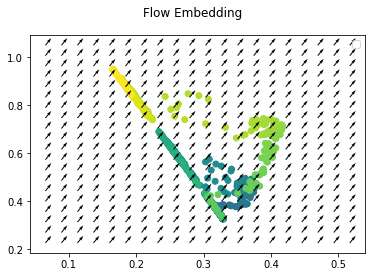

In [ ]:
MFE.visualize_points(labels)

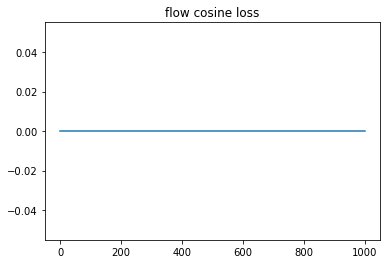

In [ ]:
MFE.visualize_loss("flow cosine loss")

In [ ]:
MFE.losses["diffusion"][0].detach().cpu().numpy()

array(14.286741, dtype=float32)

In [ ]:
!nvidia-smi

Thu Jul 14 16:07:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:82:00.0 Off |                  N/A |
| 30%   47C    P2    74W / 250W |   9459MiB / 11264MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------